In [1]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipultion tool

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score , precision_score , classification_report , confusion_matrix , accuracy_score

import xgboost as xgb
import lightgbm as lgb

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/train_set_label.csv" )

In [4]:
data.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
0,0.711636,0.673498,0.109069,0.870544,0.010808,0.660599,0.094353,0.987915,0.870476,0.447276,0.029022,0.058923,0.875395,0.875395,0.877460,0.871746,0.025669,0.028256,0.010776,0.001776,0.878873,0.453973,0.020195,1
1,0.184271,0.865533,0.181675,0.306442,0.021235,0.183804,0.484926,0.974488,0.284444,0.345343,0.148896,0.115320,0.304870,0.304870,0.295238,0.290794,0.128062,0.077815,0.044747,0.016309,0.325508,0.360384,0.045702,2
2,0.431175,0.679469,0.172644,0.750469,0.020929,0.380940,0.891717,0.946626,0.707302,0.227592,0.066246,0.109428,0.728653,0.728653,0.729524,0.723810,0.065495,0.062696,0.049242,0.006400,0.739531,0.255860,0.042004,2
3,0.712849,0.991839,0.240241,0.271420,0.036976,0.700643,0.016835,0.975159,0.268571,0.468366,0.023344,0.249158,0.270715,0.270715,0.269841,0.268571,0.146561,0.020286,0.035455,0.006678,0.267614,0.568813,0.073303,4
4,0.338077,0.996782,0.123578,0.045654,0.011389,0.088682,0.219150,0.982544,0.041905,0.630931,0.100946,0.187710,0.041746,0.041746,0.041905,0.041905,0.134704,0.011038,0.034491,0.004833,0.071762,0.699979,0.024521,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13824 entries, 0 to 13823
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         13824 non-null  float64
 1   Eccentricity     13824 non-null  float64
 2   EquivDiameter    13824 non-null  float64
 3   Extrema          13824 non-null  float64
 4   FilledArea       13824 non-null  float64
 5   Extent           13824 non-null  float64
 6   Orientation      13824 non-null  float64
 7   EulerNumber      13824 non-null  float64
 8   BoundingBox1     13824 non-null  float64
 9   BoundingBox2     13824 non-null  float64
 10  BoundingBox3     13824 non-null  float64
 11  BoundingBox4     13824 non-null  float64
 12  ConvexHull1      13824 non-null  float64
 13  ConvexHull2      13824 non-null  float64
 14  ConvexHull3      13824 non-null  float64
 15  ConvexHull4      13824 non-null  float64
 16  MajorAxisLength  13824 non-null  float64
 17  MinorAxisLen

In [6]:
data["microorganism"].value_counts()

4    3456
3    3456
2    3456
1    3456
Name: microorganism, dtype: int64

In [7]:
data.isnull().sum()


Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
microorganism      0
dtype: int64

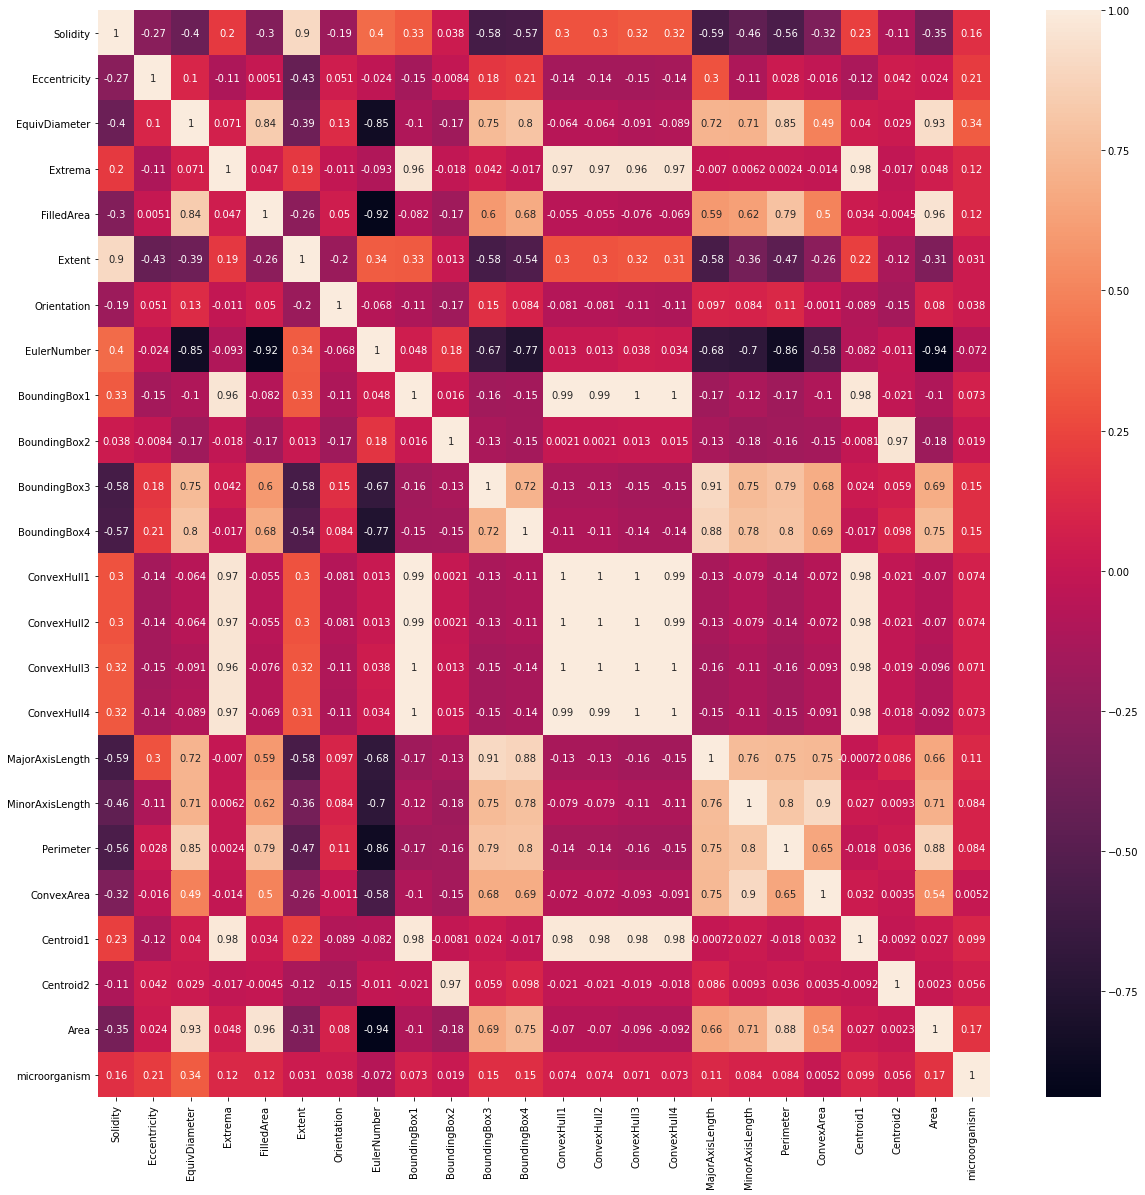

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr,annot=True)

In [9]:
data.columns

Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area',
       'microorganism'],
      dtype='object')

In [10]:
data.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
0,0.711636,0.673498,0.109069,0.870544,0.010808,0.660599,0.094353,0.987915,0.870476,0.447276,0.029022,0.058923,0.875395,0.875395,0.877460,0.871746,0.025669,0.028256,0.010776,0.001776,0.878873,0.453973,0.020195,1
1,0.184271,0.865533,0.181675,0.306442,0.021235,0.183804,0.484926,0.974488,0.284444,0.345343,0.148896,0.115320,0.304870,0.304870,0.295238,0.290794,0.128062,0.077815,0.044747,0.016309,0.325508,0.360384,0.045702,2
2,0.431175,0.679469,0.172644,0.750469,0.020929,0.380940,0.891717,0.946626,0.707302,0.227592,0.066246,0.109428,0.728653,0.728653,0.729524,0.723810,0.065495,0.062696,0.049242,0.006400,0.739531,0.255860,0.042004,2
3,0.712849,0.991839,0.240241,0.271420,0.036976,0.700643,0.016835,0.975159,0.268571,0.468366,0.023344,0.249158,0.270715,0.270715,0.269841,0.268571,0.146561,0.020286,0.035455,0.006678,0.267614,0.568813,0.073303,4
4,0.338077,0.996782,0.123578,0.045654,0.011389,0.088682,0.219150,0.982544,0.041905,0.630931,0.100946,0.187710,0.041746,0.041746,0.041905,0.041905,0.134704,0.011038,0.034491,0.004833,0.071762,0.699979,0.024521,2


In [11]:
col =['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area']

x = data[col]
y = data["microorganism"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (9676, 23)
y_train dataset:  (9676,)
X_test dataset:  (4148, 23)
y_test dataset:  (4148,)


In [13]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,f1_score
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

def run_classifier(clf, param_grid, title):
    # -----------------------------------------------------
    cv = StratifiedKFold(n_splits= 3, shuffle = True, random_state= 123)
    # Randomized grid search
    n_iter_search = 10
    gs = RandomizedSearchCV(clf, 
                            param_distributions = param_grid,
                            n_iter = n_iter_search, 
                            cv = cv, 
                            iid = False,
                            scoring= 'accuracy')
    # -----------------------------------------------------
    # Train model
    gs.fit(X_train, y_train)  
    print("The best parameters are %s" % (gs.best_params_)) 
    # Predict on test set
    y_pred = gs.best_estimator_.predict(X_test)
    # Get Probability estimates
    y_prob = gs.best_estimator_.predict_proba(X_test)[:, 1]
    # -----------------------------------------------------
    print('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_pred)*100))  
    print('Precision score: %.2f%%' % (precision_score(y_test, y_pred, average= 'weighted')*100))
    print('Recall score: %.2f%%' % (recall_score(y_test, y_pred, average= 'weighted')*100))
    print('F1 score: %.2f%%' % (f1_score(y_test, y_pred, average= 'weighted')*100))
    # print('AUC score: %.2f%%' % (roc_auc_score(y_test, y_pred, average= 'weighted')*100))
    # -----------------------------------------------------
    # Plot confusion matrix
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
    cm = confusion_matrix(y_test, y_pred)#, labels= target_names)
    sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
    ax1.set_title("Confusion Matrix")
    ax1.set_xlabel("Predicted class")
    ax1.set_ylabel("Actual class")
    # ax1.set_xticklabels(target_names)
    # ax1.set_yticklabels(target_names)
    # fig.tight_layout()
    # # -----------------------------------------------------
    # # Plot the decision boundary
    # cmap = ListedColormap(colors[:len(np.unique(y_test))])
    # # plot the decision surface
    # x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    # x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    # resolution = 0.01 # step size in the mesh
    # xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    #                        np.arange(x2_min, x2_max, resolution))
    # Z = gs.best_estimator_.predict(np.c_[xx1.ravel(), xx2.ravel()])
    # # Put the result into a color plot
    # Z = Z.reshape(xx1.shape)
    # plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    # # plot class samples
    # for idx, cl in enumerate(np.unique(y_test)):
    #     print(idx)
    #     plt.scatter(x= X_test[y_test == cl, 0], 
    #                 y= X_test[y_test == cl, 1],
    #                 alpha= 0.8, 
    #                 c= colors[idx],
    #                 marker= markers[idx], 
    #                 label= target_names[cl], 
    #                 edgecolor= 'black')    
    # ax2.set_title(title)
    # ax2.set_xlabel("PC1")
    # ax2.set_ylabel("PC2")
    # plt.xlim(xx1.min(), xx1.max())
    # plt.ylim(xx2.min(), xx2.max())
    # plt.xticks([]); plt.yticks([])
    # plt.legend(loc='lower right')
    # plt.show()       

**Support Vector Classifier**


In [ ]:
from sklearn.svm import SVC

svm_linear = SVC(kernel="linear", probability = True)

param_grid = {'gamma': np.logspace(-2, 2, 5),
              'C': np.logspace(-2, 2, 5)}

run_classifier(svm_linear, param_grid, 'Linear SVM')

The best parameters are {'gamma': 0.1, 'C': 100.0}
Accuracy score: 87.95%
Precision score: 88.02%
Recall score: 87.95%
F1 score: 87.89%


**KNeighbors Classifier**

The best parameters are {'weights': 'uniform', 'n_neighbors': 1, 'leaf_size': 1, 'algorithm': 'kd_tree'}
Accuracy score: 99.73%
Precision score: 99.74%
Recall score: 99.73%
F1 score: 99.73%


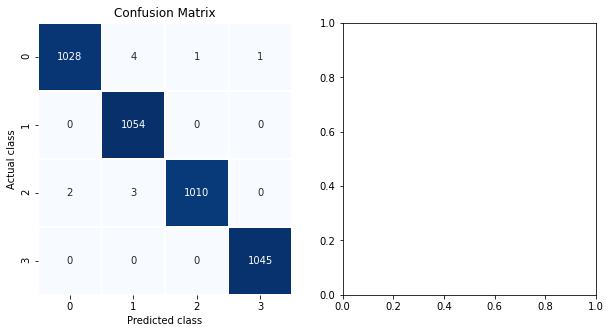

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,15), 
             'weights': ['uniform', 'distance'],
             'leaf_size':[1, 3, 5],
             'algorithm':['auto', 'kd_tree']}

run_classifier(knn, param_grid, 'Nearest Neighbors')

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

run_classifier(rfc, param_grid, 'Random Forest')


**Final Model to be Used**

In [15]:
#knn1 = KNeighborsClassifier(weights = 'distance', n_neighbors =  2, leaf_size = 5, algorithm = 'kd_tree')
knn1 = KNeighborsClassifier(weights = 'distance', n_neighbors =  1, leaf_size = 1, algorithm = 'kd_tree')
knn1.fit(x,y)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

**Testing Data**

In [16]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/test_set_label.csv')

In [17]:
test_data.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area
0,0.226508,0.919736,0.396523,0.821764,0.124955,0.182526,0.625360,0.880161,0.593651,0.130053,0.313565,0.223064,0.592030,0.592030,0.593651,0.594286,0.246947,0.114904,0.258217,0.050894,0.735949,0.224618,0.177666
1,0.131249,0.839202,0.189765,0.779862,0.024801,0.102111,0.903063,0.930178,0.697143,0.148506,0.135647,0.244949,0.755218,0.755218,0.698413,0.697143,0.168388,0.110807,0.086619,0.024327,0.782927,0.277804,0.049141
2,0.356525,0.950434,0.115916,0.711069,0.010689,0.218164,0.860724,0.969789,0.674286,0.324253,0.049211,0.135522,0.719165,0.719165,0.679365,0.676190,0.077268,0.027995,0.023458,0.004147,0.683484,0.365322,0.022188
3,0.338935,0.828545,0.029171,0.450281,0.001548,0.256960,0.188719,0.995300,0.440635,0.533392,0.019558,0.044613,0.452245,0.452245,0.451429,0.448889,0.020454,0.016625,0.010399,0.000735,0.439275,0.530411,0.003269
4,0.532809,0.747284,0.139494,0.813557,0.019737,0.485427,0.205856,0.973289,0.805078,0.815014,0.047797,0.077853,0.806157,0.806157,0.806001,0.805078,0.042423,0.038444,0.019337,0.003800,0.825515,0.826488,0.031852


In [18]:
predict = knn1.predict(test_data)

In [19]:
predict

array([3, 2, 2, ..., 4, 2, 1])

In [20]:
target = pd.DataFrame()
target['prediction'] = predict

target.to_csv("Sub.csv", index=False)
#files.download("Sub1.csv")